In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, matthews_corrcoef


from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [50]:
file_path = 'database_2025-05-18.csv'  
df = pd.read_csv(file_path, low_memory=False)

In [51]:
phase1_plates = [str(i) for i in range(1, 24)]
phase1_df= df[df['plate'].isin(phase1_plates)]

only plate 20 has 1min-5min and 5min-5min, discard them for now

In [52]:
phase1_df=phase1_df[(phase1_df['light_regime']!='5min-5min')&(phase1_df['light_regime']!='1min-5min')]

In [25]:

# Create list of columns y2_1 to y2_100
y2_cols = [f'y2_{i}' for i in range(1, 101)]

# Function to find the first y2_* column that is NaN
def first_null_col(row):
    for col in y2_cols:
        if pd.isna(row[col]):
            return col
    return None  # if no nulls

# Apply the function row-wise
phase1_df['first_null_y2'] = phase1_df[y2_cols].apply(first_null_col, axis=1)

# Check for each light regime, the distribution of first-null columns
result = phase1_df.groupby('light_regime')['first_null_y2'].value_counts().unstack(fill_value=0)
result 

first_null_y2,y2_1,y2_42,y2_46,y2_50,y2_82,y2_86,y2_90
light_regime,,,,,,,
10min-10min,699,0,0,0,7440,670,0
1min-1min,713,0,0,0,7425,0,671
20h_HL,666,7425,335,0,0,0,0
20h_ML,611,7097,335,0,0,0,0
2h-2h,681,7409,0,336,0,0,0
30s-30s,711,0,0,0,7762,0,336


### check plate 20
have same length as phase 2

In [38]:
phase1_df[phase1_df['first_null_y2']=='y2_46'][['plate','light_regime', 'start_date']].drop_duplicates()

,plate,light_regime,start_date
45912,20,20h_HL,2024-05-29
51992,20,20h_ML,2024-05-30


In [39]:
phase1_df[phase1_df['first_null_y2']=='y2_50'][['plate','light_regime', 'start_date']].drop_duplicates()

,plate,light_regime,start_date
57737,20,2h-2h,2024-05-31


In [37]:
phase1_df[phase1_df['first_null_y2']=='y2_86'][['plate','light_regime', 'start_date']].drop_duplicates()

,plate,light_regime,start_date
383,20,10min-10min,2024-06-02
46678,20,10min-10min,2024-11-21


In [35]:
phase1_df[phase1_df['first_null_y2'] == 'y2_90'][['light_regime', 'start_date']].drop_duplicates()


,light_regime,start_date
30640,1min-1min,2024-05-27
71908,1min-1min,2024-05-28
113080,30s-30s,2024-06-01


In [62]:
pd.set_option('display.max_rows', 150)
phase1_df.groupby(['plate', 'light_regime']).size().reset_index(name='row_count')


,plate,light_regime,row_count
0,1,10min-10min,383
1,1,1min-1min,383
2,1,20h_HL,383
3,1,20h_ML,383
4,1,2h-2h,383
5,1,30s-30s,383
6,2,10min-10min,383
7,2,1min-1min,383
8,2,20h_HL,383
9,2,20h_ML,383


In [15]:
phase1_df[(phase1_df['plate']=='20')&(phase1_df['light_regime']=='10min-10min')]['start_date'].unique()

array(['2024-06-02', '2024-11-21', '2024-04-10'], dtype=object)

In [17]:
phase1_df[(phase1_df['plate']=='20')&(phase1_df['light_regime']=='1min-1min')]['start_date'].unique()

array(['2024-05-27', '2024-04-06', '2024-05-28'], dtype=object)

In [18]:
phase1_df[(phase1_df['plate']=='20')&(phase1_df['light_regime']=='20h_ML')]['start_date'].unique()

array(['2024-04-08', '2024-05-30'], dtype=object)

In [19]:
phase1_df[(phase1_df['plate']=='20')&(phase1_df['light_regime']=='20h_HL')]['start_date'].unique()

array(['2024-05-29', '2024-04-07'], dtype=object)

In [22]:
phase1_df[(phase1_df['plate']=='20')&(phase1_df['light_regime']=='2h-2h')]['start_date'].unique()

array(['2024-04-09', '2024-05-31'], dtype=object)

In [21]:
phase1_df[(phase1_df['plate']=='20')&(phase1_df['light_regime']=='30s-30s')]['start_date'].unique()

array(['2024-05-05', '2024-06-01'], dtype=object)

In [53]:
# clean plate 20
plate20_filter = (
    (phase1_df['plate'] == '20') &
    (
        ((phase1_df['light_regime'] == '20h_ML')        & (phase1_df['start_date'] == '2024-04-08')) |
        ((phase1_df['light_regime'] == '20h_HL')        & (phase1_df['start_date'] == '2024-04-07')) |
        ((phase1_df['light_regime'] == '2h-2h')         & (phase1_df['start_date'] == '2024-04-09')) |
        ((phase1_df['light_regime'] == '10min-10min')   & (phase1_df['start_date'] == '2024-04-10')) |
        ((phase1_df['light_regime'] == '1min-1min')     & (phase1_df['start_date'] == '2024-04-06')) |
        ((phase1_df['light_regime'] == '30s-30s')       & (phase1_df['start_date'] == '2024-05-05'))
    )
)

phase1_df = phase1_df[(phase1_df['plate'] != '20') | plate20_filter]


In [55]:
## double check
# result = phase1_df.groupby('light_regime')['first_null_y2'].value_counts().unstack(fill_value=0)
# result 

In [56]:
# drop last data point
y2_cols = [f'y2_{i}' for i in range(1, 90)] 
def drop_last_valid(row):
    valid = row[y2_cols].last_valid_index()
    # if pd.notna(row[valid]):
    if valid is not None and pd.notna(row[valid]):
        row[valid] = np.nan
    return row

phase1_df1 = phase1_df.apply(drop_last_valid, axis=1)

In [57]:
# compute elapse time
measurement_cols = [f'measurement_time_{i}' for i in range(85)]  # Adjust 82 as needed
parsed_times = phase1_df1[measurement_cols].apply(
    pd.to_datetime,
    errors='coerce'  
)

for i, col in enumerate(measurement_cols):
    phase1_df1[f'elapsed_time_{i}'] = (parsed_times[col] - parsed_times['measurement_time_0']).dt.total_seconds() / 3600

/var/folders/t_/cq8kc3m112ndc44tfq9_3pgh0000gn/T/ipykernel_2522/1790441548.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  phase1_df1[f'elapsed_time_{i}'] = (parsed_times[col] - parsed_times['measurement_time_0']).dt.total_seconds() / 3600
/var/folders/t_/cq8kc3m112ndc44tfq9_3pgh0000gn/T/ipykernel_2522/1790441548.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  phase1_df1[f'elapsed_time_{i}'] = (parsed_times[col] - parsed_times['measurement_time_0']).dt.total_seconds() / 3600
/var/folders/t_/cq8kc3m112ndc44tfq9_3pgh0000gn

In [59]:
time_columns = [f'elapsed_time_{i}' for i in range(0, 83)]
phase1_df1[time_columns]

,elapsed_time_0,elapsed_time_1,elapsed_time_2,elapsed_time_3,elapsed_time_4,elapsed_time_5,elapsed_time_6,elapsed_time_7,elapsed_time_8,elapsed_time_9,...,elapsed_time_73,elapsed_time_74,elapsed_time_75,elapsed_time_76,elapsed_time_77,elapsed_time_78,elapsed_time_79,elapsed_time_80,elapsed_time_81,elapsed_time_82
766,0.0,0.500000,1.000278,1.500556,2.000833,2.501111,3.001389,3.501667,4.001944,4.502222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,0.0,0.500000,1.000278,1.500556,2.000833,2.501111,3.001389,3.501667,4.001944,4.502222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
768,0.0,0.500000,1.000278,1.500556,2.000833,2.501111,3.001389,3.501667,4.001944,4.502222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
769,0.0,0.500000,1.000278,1.500556,2.000833,2.501111,3.001389,3.501667,4.001944,4.502222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
770,0.0,0.500000,1.000278,1.500556,2.000833,2.501111,3.001389,3.501667,4.001944,4.502222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112692,0.0,0.333333,0.500278,0.833889,1.000833,1.334444,1.501389,1.835000,2.001944,2.335556,...,18.361667,18.528611,18.862222,19.029167,19.362778,19.529722,19.863333,20.030278,20.286111,NaN
112693,0.0,0.333333,0.500278,0.833889,1.000833,1.334444,1.501389,1.835000,2.001944,2.335556,...,18.361667,18.528611,18.862222,19.029167,19.362778,19.529722,19.863333,20.030278,20.286111,NaN
112694,0.0,0.333333,0.500278,0.833889,1.000833,1.334444,1.501389,1.835000,2.001944,2.335556,...,18.361667,18.528611,18.862222,19.029167,19.362778,19.529722,19.863333,20.030278,20.286111,NaN
112695,0.0,0.333333,0.500278,0.833889,1.000833,1.334444,1.501389,1.835000,2.001944,2.335556,...,18.361667,18.528611,18.862222,19.029167,19.362778,19.529722,19.863333,20.030278,20.286111,NaN


In [60]:
phase1_df1 ['plate'] = phase1_df1 ['plate'].astype(int)

In [ ]:
phase1_df1.to_csv('phase1_df1(5.28).csv', index=False)

## run quantile normalization


In [63]:
from scipy import interpolate
from scipy.stats import rankdata

def normalize_quantiles(A, ties=True):
    A = np.asarray(A, dtype=np.float64)
    n_rows, n_cols = A.shape
    if n_cols == 1:
        return A.copy()

    i = np.linspace(0, 1, n_rows)
    S = np.full((n_rows, n_cols), np.nan)
    nobs = np.zeros(n_cols, dtype=int)
    sort_idx = []

    for j in range(n_cols):
        col = A[:, j]
        not_nan = ~np.isnan(col)
        x = col[not_nan]
        nobs[j] = len(x)
        sort_order = np.argsort(x)
        sorted_x = x[sort_order]

        if nobs[j] < n_rows:
            f = interpolate.interp1d(np.linspace(0, 1, nobs[j]), sorted_x,
                                     bounds_error=False, fill_value="extrapolate")
            S[:, j] = f(i)
        else:
            S[:, j] = sorted_x

        sort_idx.append(np.argsort(np.argsort(col[not_nan])))

    m = np.nanmean(S, axis=1)
    A_out = np.full_like(A, np.nan)

    for j in range(n_cols):
        col = A[:, j]
        not_nan = ~np.isnan(col)

        if ties:
            r = rankdata(col[not_nan], method='average')
            quant_pos = (r - 1) / (nobs[j] - 1)
            f = interpolate.interp1d(i, m, bounds_error=False, fill_value="extrapolate")
            A_out[not_nan, j] = f(quant_pos)
        else:
            ranks = sort_idx[j]
            A_out[not_nan, j] = m[ranks.astype(int)]

    return A_out

In [64]:
# 1. Filter to '20h_ML' condition
phase1_20h_ML = phase1_df1[phase1_df1['light_regime'] == '20h_ML'].copy()
phase1_20h_ML_normalized = phase1_20h_ML.copy()

y2_cols = [f'y2_{i}' for i in range(1, 41)]
plates = sorted(phase1_20h_ML['plate'].unique())

for timepoint in y2_cols:
    position_values = []
    valid_plate_indices = {}

    for plate in plates:
        subset = phase1_20h_ML[phase1_20h_ML['plate'] == plate].copy()
        subset = subset.sort_values(['i', 'j'])

        values = subset[timepoint].values
        index = subset.index.values

        position_values.append(values)
        valid_plate_indices[plate] = index

    # Check all plates have same number of positions
    lengths = [len(v) for v in position_values]
    if len(set(lengths)) != 1:
        raise ValueError(f"Mismatch in number of positions for {timepoint}")

    # Normalize across plates at this timepoint
    matrix = np.column_stack(position_values)
    normalized_matrix = normalize_quantiles(matrix, ties=True)

    # Write normalized values back to copy
    for col_idx, plate in enumerate(plates):
        indices = valid_plate_indices[plate]
        phase1_20h_ML_normalized.loc[indices, timepoint] = normalized_matrix[:, col_idx]

In [65]:
# 1. Filter to '20h_HL' condition
phase1_20h_HL = phase1_df1[phase1_df1['light_regime'] == '20h_HL'].copy()
phase1_20h_HL_normalized = phase1_20h_HL.copy()

y2_cols = [f'y2_{i}' for i in range(1, 41)]
plates = sorted(phase1_20h_HL['plate'].unique())

for timepoint in y2_cols:
    position_values = []
    valid_plate_indices = {}

    for plate in plates:
        subset = phase1_20h_HL[phase1_20h_HL['plate'] == plate].copy()
        subset = subset.sort_values(['i', 'j'])

        values = subset[timepoint].values
        index = subset.index.values

        position_values.append(values)
        valid_plate_indices[plate] = index

    # Check all plates have same number of positions
    lengths = [len(v) for v in position_values]
    if len(set(lengths)) != 1:
        raise ValueError(f"Mismatch in number of positions for {timepoint}")

    # Normalize across plates at this timepoint
    matrix = np.column_stack(position_values)
    normalized_matrix = normalize_quantiles(matrix, ties=True)

    # Write normalized values back to copy
    for col_idx, plate in enumerate(plates):
        indices = valid_plate_indices[plate]
        phase1_20h_HL_normalized.loc[indices, timepoint] = normalized_matrix[:, col_idx]

In [66]:
#  '2H-2H' condition
phase1_2h_2h = phase1_df1[phase1_df1['light_regime'] == '2h-2h'].copy()
phase1_2h_2h_normalized = phase1_2h_2h.copy()

y2_cols = [f'y2_{i}' for i in range(1, 41)]
plates = sorted(phase1_2h_2h['plate'].unique())

for timepoint in y2_cols:
    position_values = []
    valid_plate_indices = {}

    for plate in plates:
        subset = phase1_2h_2h[phase1_2h_2h['plate'] == plate].copy()
        subset = subset.sort_values(['i', 'j'])

        values = subset[timepoint].values
        index = subset.index.values

        position_values.append(values)
        valid_plate_indices[plate] = index

    # Check all plates have same number of positions
    lengths = [len(v) for v in position_values]
    if len(set(lengths)) != 1:
        raise ValueError(f"Mismatch in number of positions for {timepoint}")

    # Normalize across plates at this timepoint
    matrix = np.column_stack(position_values)
    normalized_matrix = normalize_quantiles(matrix, ties=True)

    # Write normalized values back to copy
    for col_idx, plate in enumerate(plates):
        indices = valid_plate_indices[plate]
        phase1_2h_2h_normalized.loc[indices, timepoint] = normalized_matrix[:, col_idx]


In [67]:
phase1_2h_2h_normalized.shape

(8043, 811)

In [68]:
#  10min_10min condition
phase1_10min_10min = phase1_df1[phase1_df1['light_regime'] == '10min-10min'].copy()
phase1_10min_10min_normalized = phase1_10min_10min.copy()

y2_cols = [f'y2_{i}' for i in range(1, 81)]
plates = sorted(phase1_10min_10min['plate'].unique())

for timepoint in y2_cols:
    position_values = []
    valid_plate_indices = {}

    for plate in plates:
        subset = phase1_10min_10min[phase1_10min_10min['plate'] == plate].copy()
        subset = subset.sort_values(['i', 'j'])

        values = subset[timepoint].values
        index = subset.index.values

        position_values.append(values)
        valid_plate_indices[plate] = index

    # Check all plates have same number of positions
    lengths = [len(v) for v in position_values]
    if len(set(lengths)) != 1:
        raise ValueError(f"Mismatch in number of positions for {timepoint}")

    # Normalize across plates at this timepoint
    matrix = np.column_stack(position_values)
    normalized_matrix = normalize_quantiles(matrix, ties=True)

    # Write normalized values back to copy
    for col_idx, plate in enumerate(plates):
        indices = valid_plate_indices[plate]
        phase1_10min_10min_normalized.loc[indices, timepoint] = normalized_matrix[:, col_idx]

In [69]:
#  1min_1min condition
phase1_1min_1min = phase1_df1[phase1_df1['light_regime'] == '1min-1min'].copy()
phase1_1min_1min_normalized = phase1_1min_1min.copy()

y2_cols = [f'y2_{i}' for i in range(1, 81)]
plates = sorted(phase1_1min_1min['plate'].unique())

for timepoint in y2_cols:
    position_values = []
    valid_plate_indices = {}

    for plate in plates:
        subset = phase1_1min_1min[phase1_1min_1min['plate'] == plate].copy()
        subset = subset.sort_values(['i', 'j'])

        values = subset[timepoint].values
        index = subset.index.values

        position_values.append(values)
        valid_plate_indices[plate] = index

    # Check all plates have same number of positions
    lengths = [len(v) for v in position_values]
    if len(set(lengths)) != 1:
        raise ValueError(f"Mismatch in number of positions for {timepoint}")

    # Normalize across plates at this timepoint
    matrix = np.column_stack(position_values)
    normalized_matrix = normalize_quantiles(matrix, ties=True)

    # Write normalized values back to copy
    for col_idx, plate in enumerate(plates):
        indices = valid_plate_indices[plate]
        phase1_1min_1min_normalized.loc[indices, timepoint] = normalized_matrix[:, col_idx]

In [70]:
phase1_1min_1min_normalized.shape

(8043, 811)

In [71]:
#  30s-30s condition
phase1_30s_30s = phase1_df1[phase1_df1['light_regime'] == '30s-30s'].copy()
phase1_30s_30s_normalized = phase1_30s_30s.copy()

y2_cols = [f'y2_{i}' for i in range(1, 81)]
plates = sorted(phase1_30s_30s['plate'].unique())

for timepoint in y2_cols:
    position_values = []
    valid_plate_indices = {}

    for plate in plates:
        subset = phase1_30s_30s[phase1_30s_30s['plate'] == plate].copy()
        subset = subset.sort_values(['i', 'j'])

        values = subset[timepoint].values
        index = subset.index.values

        position_values.append(values)
        valid_plate_indices[plate] = index

    # Check all plates have same number of positions
    lengths = [len(v) for v in position_values]
    if len(set(lengths)) != 1:
        raise ValueError(f"Mismatch in number of positions for {timepoint}")

    # Normalize across plates at this timepoint
    matrix = np.column_stack(position_values)
    normalized_matrix = normalize_quantiles(matrix, ties=True)

    # Write normalized values back to copy
    for col_idx, plate in enumerate(plates):
        indices = valid_plate_indices[plate]
        phase1_30s_30s_normalized.loc[indices, timepoint] = normalized_matrix[:, col_idx]

In [72]:
phase1_quantile_normal= pd.concat([
    phase1_20h_ML_normalized,
    phase1_20h_HL_normalized,
    phase1_2h_2h_normalized,
    phase1_10min_10min_normalized,
    phase1_1min_1min_normalized,
    phase1_30s_30s_normalized
], ignore_index=True)

In [73]:
phase1_quantile_normal.shape

(48258, 811)

## Compute Slope

In [74]:
## drop null rows
y2_cols = [f'y2_{i}' for i in range(1, 81)]  # or whatever your full range is
phase1_quantile_normal_new = phase1_quantile_normal[~(phase1_quantile_normal['mutant_ID'].isna() & phase1_quantile_normal['mutated_genes'].isna())]
phase1_quantile_normal_new = phase1_quantile_normal_new.dropna(subset=y2_cols, how='all')
phase1_quantile_normal_new.shape

(44278, 811)

In [75]:
def add_y2_slope_and_intercept(hdata):
    # Define time and response columns
    time_columns = [f'elapsed_time_{i}' for i in range(0, 81)]
    response_columns = [f'y2_{i}' for i in range(1, 82)]

    def compute_regression(row):
        time_values = row[time_columns].values.astype(float)
        y_values = row[response_columns].values.astype(float)
        # mask = ~np.isnan(y_values)
        mask = ~np.isnan(y_values) & ~np.isnan(time_values)


        if mask.sum() >= 2:
            model = LinearRegression()
            model.fit(time_values[mask].reshape(-1, 1), y_values[mask])

            return pd.Series({
                'y2_slope': model.coef_[0],
                'y2_intercept': model.intercept_
            })
        return pd.Series({'y2_slope': np.nan, 'y2_intercept': np.nan})

    # Apply regression row-wise
    hdata[['y2_slope', 'y2_intercept']] = hdata.apply(compute_regression, axis=1)
    
    return hdata

In [76]:
phase1_quantile_normal_new=add_y2_slope_and_intercept(phase1_quantile_normal_new)

In [96]:
phase1_quantile_normal_new.shape

(44278, 813)

In [ ]:
phase1_quantile_normal_new.to_csv('phase1_qn_slope(5.18).csv',index=False)

In [79]:
phase1_quantile_normal_new['plate'] = phase1_quantile_normal_new['plate'].astype(int)

In [82]:
# Separate WT and mutants
wt_df = phase1_quantile_normal_new[phase1_quantile_normal_new['mutant_ID'] == 'WT']
mutant_df = phase1_quantile_normal_new[phase1_quantile_normal_new['mutant_ID'] != 'WT']

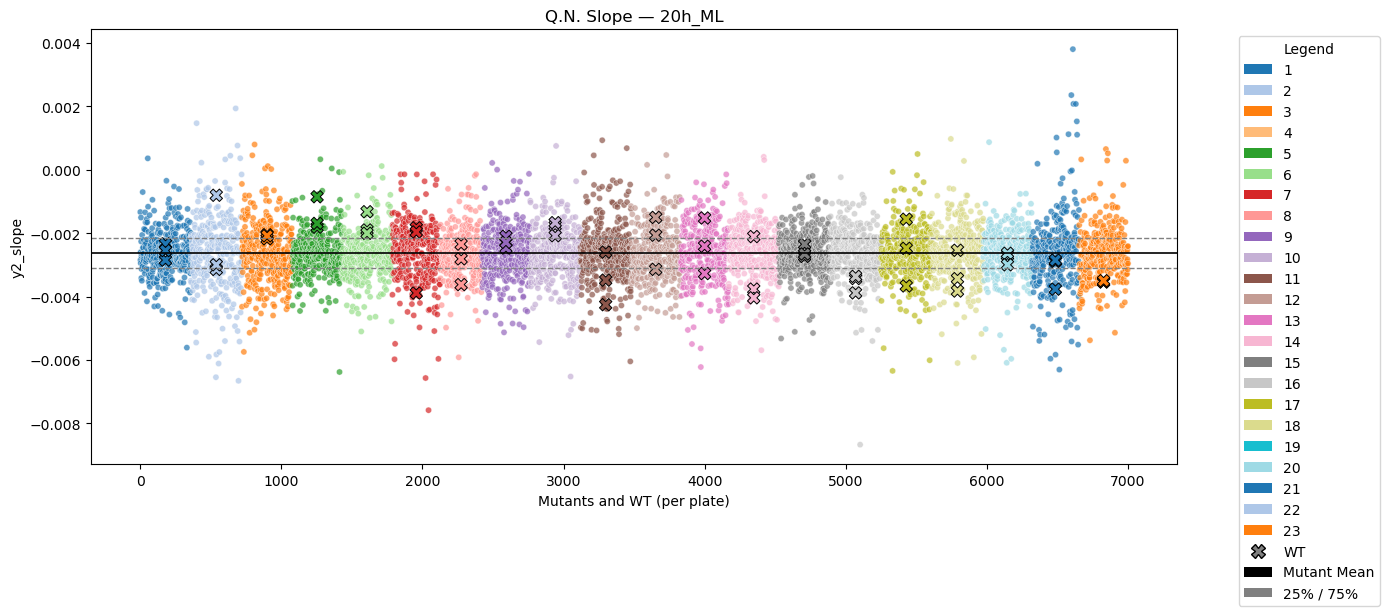

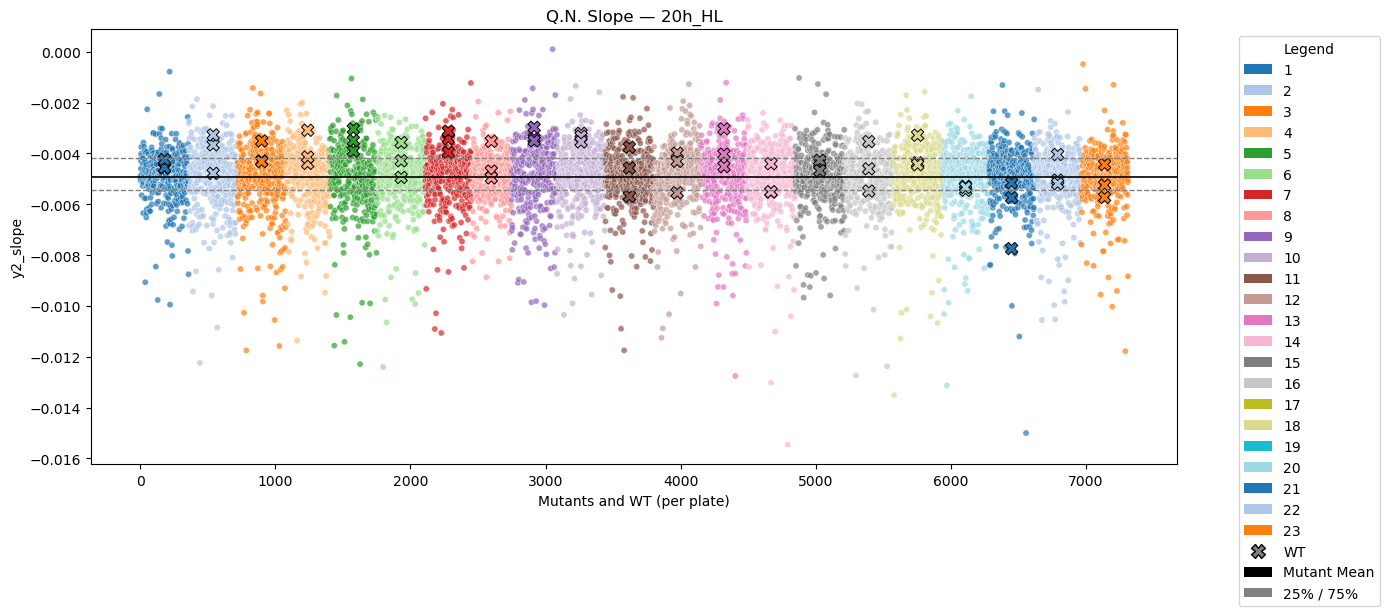

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

all_plates = list(range(1, 24))  # Plates 1 to 23
global_palette = sns.color_palette('tab20', len(all_plates))
plate_to_color = dict(zip(all_plates, global_palette))

light_regimes = ['20h_ML', '20h_HL']

for regime in light_regimes:
    # Filter mutants (excluding plate 99)
    sub_df = mutant_df[(mutant_df['light_regime'] == regime) & (mutant_df['plate'] != 99)].copy()
    sub_df = sub_df.sort_values(by='plate').reset_index(drop=True)
    sub_df['index'] = sub_df.index

    # Compute summary stats
    mean_val = sub_df['y2_slope'].mean()
    q1 = sub_df['y2_slope'].quantile(0.25)
    q3 = sub_df['y2_slope'].quantile(0.75)

    # Prepare WT data (same regime and plates)
    sub_wt_df = wt_df[
        (wt_df['light_regime'] == regime) &
        (wt_df['plate'].isin(sub_df['plate'].unique()))
    ].copy()
    plate_to_index = sub_df.groupby('plate')['index'].median().to_dict()
    sub_wt_df['index'] = sub_wt_df['plate'].map(plate_to_index)

    # Plot
    plt.figure(figsize=(14, 6))

    # Plot mutants
    sns.scatterplot(
        data=sub_df,
        x='index',
        y='y2_slope',
        hue='plate',
        palette=plate_to_color,
        alpha=0.7,
        s=20,
        legend=False
    )

    # Plot wild types
    sns.scatterplot(
        data=sub_wt_df,
        x='index',
        y='y2_slope',
        hue='plate',
        palette=plate_to_color,
        marker='X',
        s=80,
        edgecolor='black',
        legend=False
    )

    # Horizontal lines
    plt.axhline(mean_val, color='black', linestyle='-', linewidth=1.2, label='Mutant Mean')
    plt.axhline(q1, color='gray', linestyle='--', linewidth=1, label='25% Quantile')
    plt.axhline(q3, color='gray', linestyle='--', linewidth=1, label='75% Quantile')

    # Build consistent legend
    legend_elements = [
        Patch(facecolor=plate_to_color[plate], label=f'{plate}')
        for plate in all_plates
    ]
    legend_elements += [
        Line2D([0], [0], marker='X', color='w', markerfacecolor='gray',
               markeredgecolor='black', markersize=10, label='WT'),
        Patch(facecolor='black', label='Mutant Mean'),
        Patch(facecolor='gray', label='25% / 75%', linestyle='--')
    ]

    plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', title="Legend")
    plt.xlabel("Mutants and WT (per plate)")
    plt.ylabel("y2_slope")
    plt.title(f"Q.N. Slope — {regime}")
    plt.tight_layout()
    plt.show()

## fit two regression

In [87]:
df_alter = phase1_quantile_normal_new[phase1_quantile_normal_new['light_regime'].isin(['2h-2h','10min-10min', '1min-1min', '30s-30s'])]
df_alter

,plate,measurement,start_date,light_regime,dark_threshold,light_threshold,num_frames,i,j,fv_fm,...,elapsed_time_77,elapsed_time_78,elapsed_time_79,elapsed_time_80,elapsed_time_81,elapsed_time_82,elapsed_time_83,elapsed_time_84,y2_slope,y2_intercept
15704,5,M4,2023-11-08,2h-2h,18.047827,26.282505,84,0,2,0.596926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005161,0.375080
15705,5,M4,2023-11-08,2h-2h,18.047827,26.282505,84,0,3,0.630005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004201,0.392047
15706,5,M4,2023-11-08,2h-2h,18.047827,26.282505,84,0,4,0.600066,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004831,0.354267
15707,5,M4,2023-11-08,2h-2h,18.047827,26.282505,84,0,5,0.593077,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005110,0.360526
15708,5,M4,2023-11-08,2h-2h,18.047827,26.282505,84,0,6,0.556002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004589,0.312565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48253,7,M6,2024-04-16,30s-30s,13.907259,25.695782,164,15,19,0.607222,...,19.671111,19.679722,20.174444,20.183056,20.438889,NaN,NaN,NaN,0.000246,0.347192
48254,7,M6,2024-04-16,30s-30s,13.907259,25.695782,164,15,20,0.596970,...,19.671111,19.679722,20.174444,20.183056,20.438889,NaN,NaN,NaN,0.000447,0.350350
48255,7,M6,2024-04-16,30s-30s,13.907259,25.695782,164,15,21,0.577532,...,19.671111,19.679722,20.174444,20.183056,20.438889,NaN,NaN,NaN,0.000670,0.327161
48256,7,M6,2024-04-16,30s-30s,13.907259,25.695782,164,15,22,0.665031,...,19.671111,19.679722,20.174444,20.183056,20.438889,NaN,NaN,NaN,-0.001277,0.428252


In [86]:
light_ML = pd.read_csv('Data light on off/20231203 99-M3 20h ML.csv', sep=';')
light_ML = light_ML.loc[:, ~light_ML.columns.str.contains('^Unnamed')]
light_ML = light_ML.iloc[1:-1].reset_index(drop=True)

light_HL = pd.read_csv('Data light on off/20231202 99-M2 20h HL.csv', sep=';')
light_HL = light_HL.loc[:, ~light_HL.columns.str.contains('^Unnamed')]
light_HL = light_HL.iloc[1:-1].reset_index(drop=True)

light_2h = pd.read_csv('Data light on off/20231204 99-M4 2h-2h.csv', sep=';')
light_2h = light_2h.loc[:, ~light_2h.columns.str.contains('^Unnamed')]
light_2h = light_2h.iloc[1:-1].reset_index(drop=True)

light_1min = pd.read_csv('Data light on off/20231201 99-M1 1min-1min.csv', sep=';')
light_1min = light_1min.loc[:, ~light_1min.columns.str.contains('^Unnamed')]
light_1min = light_1min.iloc[1:-1].reset_index(drop=True)

light_10min = pd.read_csv('Data light on off/20231205 99-M5 10min-10min.csv', sep=';')
light_10min = light_10min.loc[:, ~light_10min.columns.str.contains('^Unnamed')]
light_10min = light_10min.iloc[1:-1].reset_index(drop=True)

light_30s=pd.read_csv('Data light on off/20240124_11-M6_30s-30s.csv', sep=';')
light_30s = light_30s.loc[:, ~light_30s.columns.str.contains('^Unnamed')]
light_30s = light_30s.iloc[1:-1].reset_index(drop=True)

In [90]:
def feature_with_light_split(df, light_dict, n_timepoints_dict):

    all_results = []

    for regime, group_df in df.groupby('light_regime'):
        if regime not in light_dict:
            continue  # skip if no light info provided for this regime

        light = light_dict[regime]
        n_timepoints = n_timepoints_dict[regime]

        # Extract ON/OFF mask
        par_values = light['PAR'].values[:n_timepoints]
        mask_on = par_values > 0
        mask_off = par_values == 0

        time_cols = [f'elapsed_time_{i}' for i in range(2, n_timepoints + 2)]
        y_cols = [f'y2_{i}' for i in range(1, n_timepoints + 1)]

        def compute_slopes(row):
            time_vals = row[time_cols].values
            y_vals = row[y_cols].values.astype(float)
        
            result = {
                'y2_slope_on': np.nan,
                'y2_intercept_on': np.nan,
                'y2_slope_off': np.nan,
                'y2_intercept_off': np.nan,
            }
        
            # ON
            valid_on = mask_on & ~np.isnan(y_vals)
            if valid_on.sum() >= 2:
                model_on = LinearRegression()
                model_on.fit(time_vals[valid_on].reshape(-1, 1), y_vals[valid_on])
                result['y2_slope_on'] = model_on.coef_[0]
                result['y2_intercept_on'] = model_on.intercept_
        
            # OFF
            valid_off = mask_off & ~np.isnan(y_vals)
            if valid_off.sum() >= 2:
                model_off = LinearRegression()
                model_off.fit(time_vals[valid_off].reshape(-1, 1), y_vals[valid_off])
                result['y2_slope_off'] = model_off.coef_[0]
                result['y2_intercept_off'] = model_off.intercept_
        
            return pd.Series(result)

        slopes = group_df.apply(compute_slopes, axis=1)
        result = pd.concat([group_df, slopes], axis=1)
        #.reset_index(drop=True)
        all_results.append(result)

    # Combine results from all regimes
    return pd.concat(all_results, ignore_index=True)

In [91]:
light_dict = {
    '2h-2h': light_2h,
    '10min-10min': light_10min,
    '1min-1min': light_1min,
    '30s-30s': light_30s,
}

n_timepoints_dict = {
    '2h-2h': 40,
    '10min-10min': 80,
    '1min-1min': 80,
    '30s-30s': 80,
}

df1 = feature_with_light_split(df_alter, light_dict, n_timepoints_dict)

In [92]:
# Separate WT and mutants
wt_df =df1[df1['mutant_ID'] == 'WT']
mutant_df =df1[df1['mutant_ID'] != 'WT']

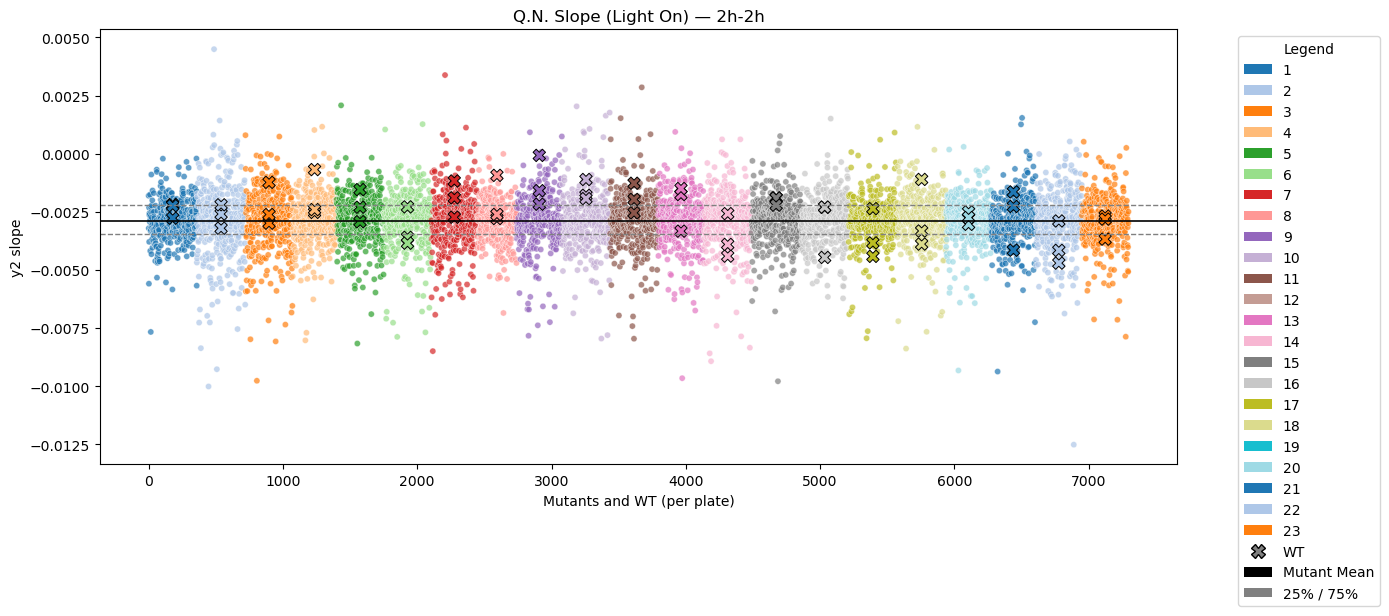

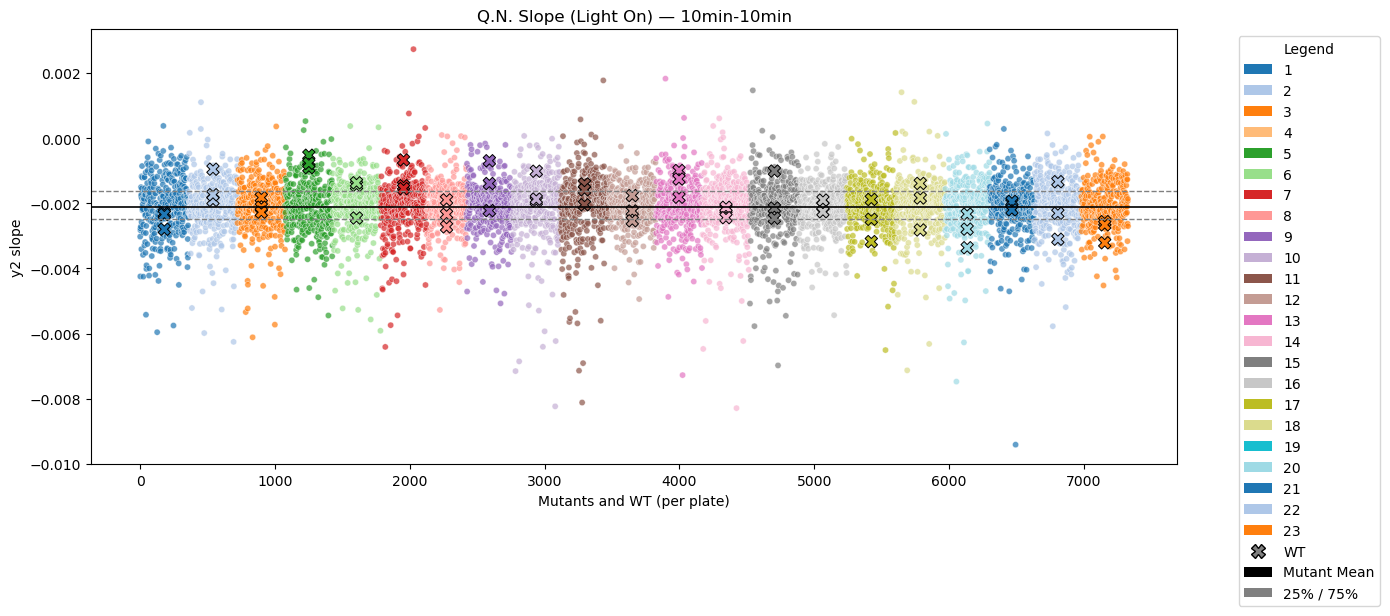

In [103]:

all_plates = list(range(1, 24))  # Plates 1 to 23
global_palette = sns.color_palette('tab20', len(all_plates))
plate_to_color = dict(zip(all_plates, global_palette))

light_regimes = ['2h-2h','10min-10min']

for regime in light_regimes:
    # Filter mutants (excluding plate 99)
    sub_df = mutant_df[(mutant_df['light_regime'] == regime) & (mutant_df['plate'] != 99)].copy()
    sub_df = sub_df.sort_values(by='plate').reset_index(drop=True)
    sub_df['index'] = sub_df.index

    # Compute summary stats
    mean_val = sub_df['y2_slope_on'].mean()
    q1 = sub_df['y2_slope_on'].quantile(0.25)
    q3 = sub_df['y2_slope_on'].quantile(0.75)

    # Prepare WT data (same regime and plates)
    sub_wt_df = wt_df[
        (wt_df['light_regime'] == regime) &
        (wt_df['plate'].isin(sub_df['plate'].unique()))
    ].copy()
    plate_to_index = sub_df.groupby('plate')['index'].median().to_dict()
    sub_wt_df['index'] = sub_wt_df['plate'].map(plate_to_index)

    # Plot
    plt.figure(figsize=(14, 6))

    # Plot mutants
    sns.scatterplot(
        data=sub_df,
        x='index',
        y='y2_slope_on',
        hue='plate',
        palette=plate_to_color,
        alpha=0.7,
        s=20,
        legend=False
    )

    # Plot wild types
    sns.scatterplot(
        data=sub_wt_df,
        x='index',
        y='y2_slope_on',
        hue='plate',
        palette=plate_to_color,
        marker='X',
        s=80,
        edgecolor='black',
        legend=False
    )

    # Horizontal lines
    plt.axhline(mean_val, color='black', linestyle='-', linewidth=1.2, label='Mutant Mean')
    plt.axhline(q1, color='gray', linestyle='--', linewidth=1, label='25% Quantile')
    plt.axhline(q3, color='gray', linestyle='--', linewidth=1, label='75% Quantile')

    # Build consistent legend
    legend_elements = [
        Patch(facecolor=plate_to_color[plate], label=f'{plate}')
        for plate in all_plates
    ]
    legend_elements += [
        Line2D([0], [0], marker='X', color='w', markerfacecolor='gray',
               markeredgecolor='black', markersize=10, label='WT'),
        Patch(facecolor='black', label='Mutant Mean'),
        Patch(facecolor='gray', label='25% / 75%', linestyle='--')
    ]

    plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', title="Legend")
    plt.xlabel("Mutants and WT (per plate)")
    plt.ylabel("y2 slope")
    plt.title(f"Q.N. Slope (Light On) — {regime}")
    plt.tight_layout()
    plt.show()

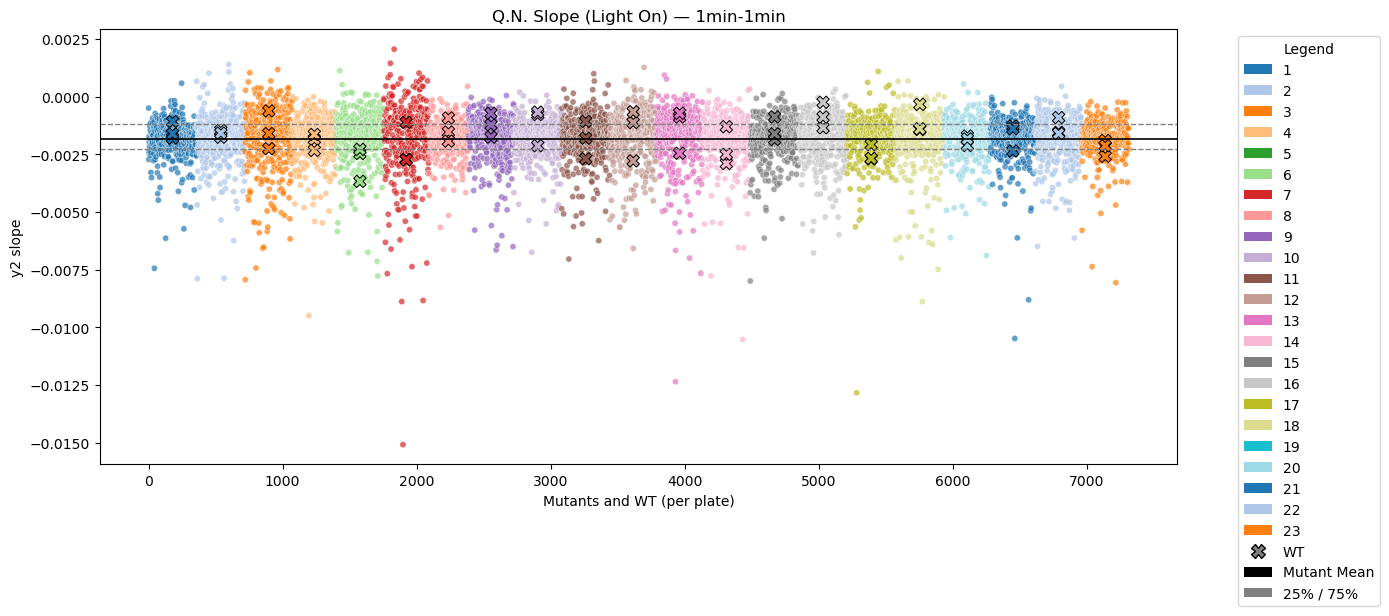

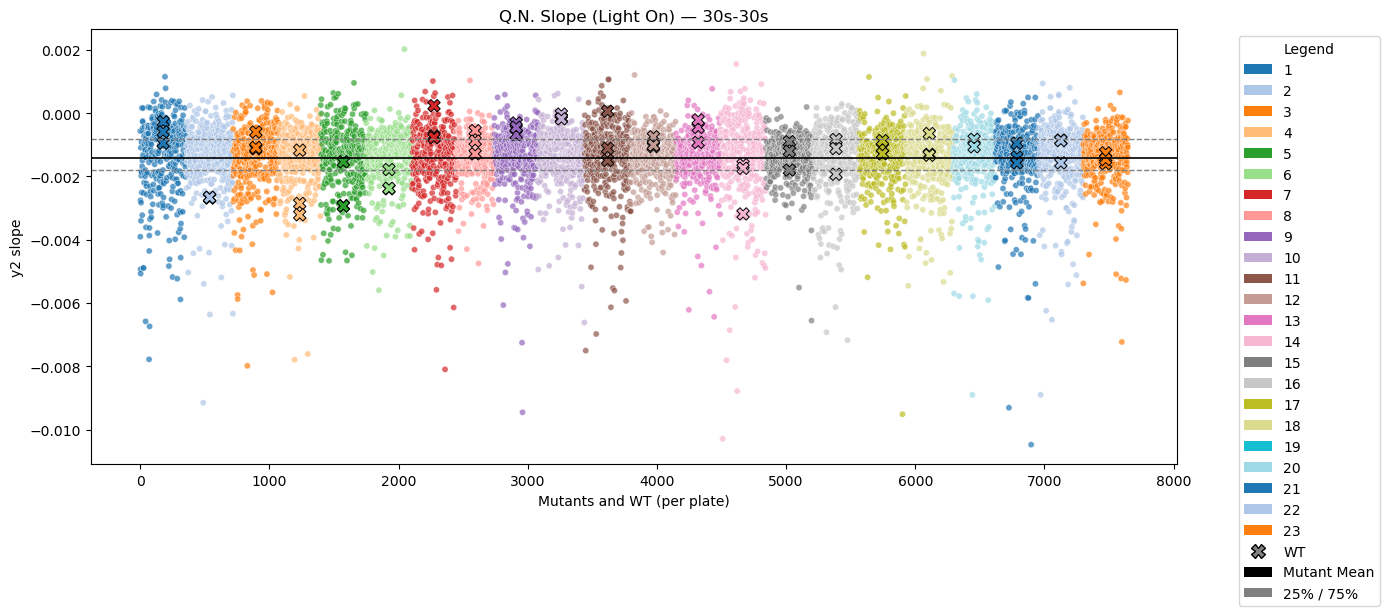

In [101]:

all_plates = list(range(1, 24))  # Plates 1 to 23
global_palette = sns.color_palette('tab20', len(all_plates))
plate_to_color = dict(zip(all_plates, global_palette))

light_regimes = ['1min-1min','30s-30s']

for regime in light_regimes:
    # Filter mutants (excluding plate 99)
    sub_df = mutant_df[(mutant_df['light_regime'] == regime) & (mutant_df['plate'] != 99)].copy()
    sub_df = sub_df.sort_values(by='plate').reset_index(drop=True)
    sub_df['index'] = sub_df.index

    # Compute summary stats
    mean_val = sub_df['y2_slope_on'].mean()
    q1 = sub_df['y2_slope_on'].quantile(0.25)
    q3 = sub_df['y2_slope_on'].quantile(0.75)

    # Prepare WT data (same regime and plates)
    sub_wt_df = wt_df[
        (wt_df['light_regime'] == regime) &
        (wt_df['plate'].isin(sub_df['plate'].unique()))
    ].copy()
    plate_to_index = sub_df.groupby('plate')['index'].median().to_dict()
    sub_wt_df['index'] = sub_wt_df['plate'].map(plate_to_index)

    # Plot
    plt.figure(figsize=(14, 6))

    # Plot mutants
    sns.scatterplot(
        data=sub_df,
        x='index',
        y='y2_slope_on',
        hue='plate',
        palette=plate_to_color,
        alpha=0.7,
        s=20,
        legend=False
    )

    # Plot wild types
    sns.scatterplot(
        data=sub_wt_df,
        x='index',
        y='y2_slope_on',
        hue='plate',
        palette=plate_to_color,
        marker='X',
        s=80,
        edgecolor='black',
        legend=False
    )
    # Horizontal lines
    plt.axhline(mean_val, color='black', linestyle='-', linewidth=1.2, label='Mutant Mean')
    plt.axhline(q1, color='gray', linestyle='--', linewidth=1, label='25% Quantile')
    plt.axhline(q3, color='gray', linestyle='--', linewidth=1, label='75% Quantile')

    # Build consistent legend
    legend_elements = [
        Patch(facecolor=plate_to_color[plate], label=f'{plate}')
        for plate in all_plates
    ]
    legend_elements += [
        Line2D([0], [0], marker='X', color='w', markerfacecolor='gray',
               markeredgecolor='black', markersize=10, label='WT'),
        Patch(facecolor='black', label='Mutant Mean'),
        Patch(facecolor='gray', label='25% / 75%', linestyle='--')
    ]

    plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', title="Legend")
    plt.xlabel("Mutants and WT (per plate)")
    plt.ylabel("y2 slope")
    plt.title(f"Q.N. Slope (Light On) — {regime}")
    plt.tight_layout()
    plt.show()

In [95]:
alt_light_regimes = ['2h-2h', '10min-10min', '1min-1min', '30s-30s']

# Separate out the two subsets
df_alt= df1.copy()  # includes extra columns
df_non_alt = phase1_quantile_normal_new[~phase1_quantile_normal_new['light_regime'].isin(alt_light_regimes)].copy()

# Make sure df_non_alt has the same columns (add missing columns as NaN)
for col in df_alt.columns:
    if col not in df_non_alt.columns:
        df_non_alt[col] = np.nan

# Reorder columns to match df_alt
df_non_alt = df_non_alt[df_alt.columns]

# Concatenate the full DataFrame
combined_df = pd.concat([df_alt, df_non_alt], ignore_index=True)
combined_df.shape

(44278, 817)

In [97]:
combined_df

,plate,measurement,start_date,light_regime,dark_threshold,light_threshold,num_frames,i,j,fv_fm,...,elapsed_time_81,elapsed_time_82,elapsed_time_83,elapsed_time_84,y2_slope,y2_intercept,y2_slope_on,y2_intercept_on,y2_slope_off,y2_intercept_off
0,18,M5,2024-03-05,10min-10min,20.425804,29.181961,164,0,1,0.576961,...,20.281667,NaN,NaN,NaN,-0.002171,0.364104,-0.003059,0.186725,-0.001290,0.543721
1,18,M5,2024-03-05,10min-10min,20.425804,29.181961,164,0,2,0.651953,...,20.281667,NaN,NaN,NaN,-0.002730,0.434246,-0.004099,0.268263,-0.001369,0.603044
2,18,M5,2024-03-05,10min-10min,20.425804,29.181961,164,0,3,0.624463,...,20.281667,NaN,NaN,NaN,-0.002107,0.393233,-0.002856,0.212475,-0.001363,0.576154
3,18,M5,2024-03-05,10min-10min,20.425804,29.181961,164,0,4,0.572512,...,20.281667,NaN,NaN,NaN,-0.001473,0.358746,-0.002197,0.181961,-0.000753,0.537054
4,18,M5,2024-03-05,10min-10min,20.425804,29.181961,164,0,5,0.505590,...,20.281667,NaN,NaN,NaN,-0.001794,0.320206,-0.002282,0.148754,-0.001310,0.493488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44273,22,M2,2024-03-20,20h_HL,15.326361,24.774212,84,15,19,0.686428,...,NaN,NaN,NaN,NaN,-0.009034,0.286561,NaN,NaN,NaN,NaN
44274,22,M2,2024-03-20,20h_HL,15.326361,24.774212,84,15,20,0.528924,...,NaN,NaN,NaN,NaN,-0.003149,0.168672,NaN,NaN,NaN,NaN
44275,22,M2,2024-03-20,20h_HL,15.326361,24.774212,84,15,21,0.576597,...,NaN,NaN,NaN,NaN,-0.004023,0.201633,NaN,NaN,NaN,NaN
44276,22,M2,2024-03-20,20h_HL,15.326361,24.774212,84,15,22,0.589426,...,NaN,NaN,NaN,NaN,-0.004273,0.216051,NaN,NaN,NaN,NaN


In [98]:
combined_df.to_csv('phase1_qn_slopes(5.18).csv',index=False)